# EDA

In [2]:
import os
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yaml
from dotenv import load_dotenv

import src.features.basic as basic_ftr
import src.features.transforms as transforms
import src.utils.io as io_utils
import src.visualization.plotting as plotting

In [3]:
load_dotenv()
warnings.filterwarnings("ignore")
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams.update(
    {
        "figure.figsize": (10, 6),
        "axes.titlesize": 16,
        "axes.labelsize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "figure.dpi": 100,
    }
)

sns.set_theme(style="whitegrid", palette="muted")
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)

ROOT = Path(os.getenv("ROOT"))
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [6]:
with open(ROOT / "src/config/data.yaml") as f:
    data_cfg = yaml.safe_load(f)["data_full"]

train_path, test_path = ROOT / data_cfg["train_path"], ROOT / data_cfg["test_path"]

In [8]:
data = pd.read_csv(train_path, sep=";")
test_data = pd.read_csv(test_path)

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
test_data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


In [10]:
data.shape, test_data.shape

((45211, 17), (250000, 17))

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
# assert len(data.id.unique()) == data.shape[0]
assert data.drop_duplicates().shape[0] == data.shape[0]
assert data.T.drop_duplicates().shape[0] == data.shape[1]

In [14]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [15]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [29]:
data_full = data.copy()
data_ids = data.index
target = data["y"].map({"yes": 1, "no": 0})
data = data.drop(columns=["y"])

In [30]:
target.value_counts(normalize=True)

y
0    0.883015
1    0.116985
Name: proportion, dtype: float64

In [18]:
cat_features_origin = basic_ftr.get_features_names(data)["categorical"]
num_features_origin = basic_ftr.get_features_names(data)["numeric"]

print(f"categorical fetures: {cat_features_origin}")
print(f"numeric fetures: {num_features_origin}")

categorical fetures: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numeric fetures: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


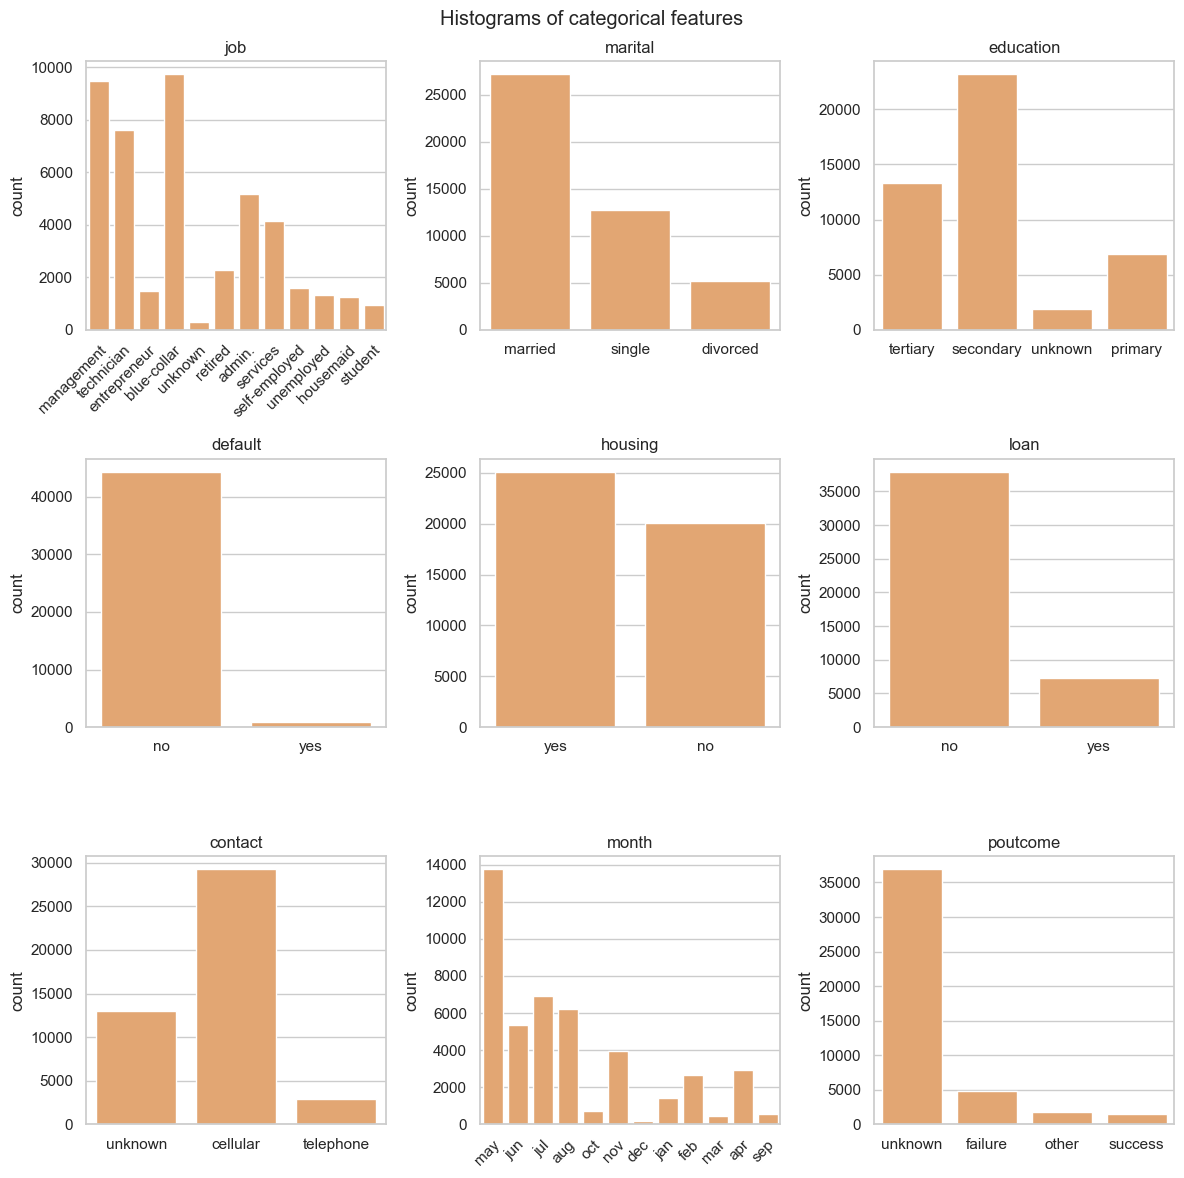

In [19]:
plotting.plotting_countplot_categorical_features(data, cat_features_origin)

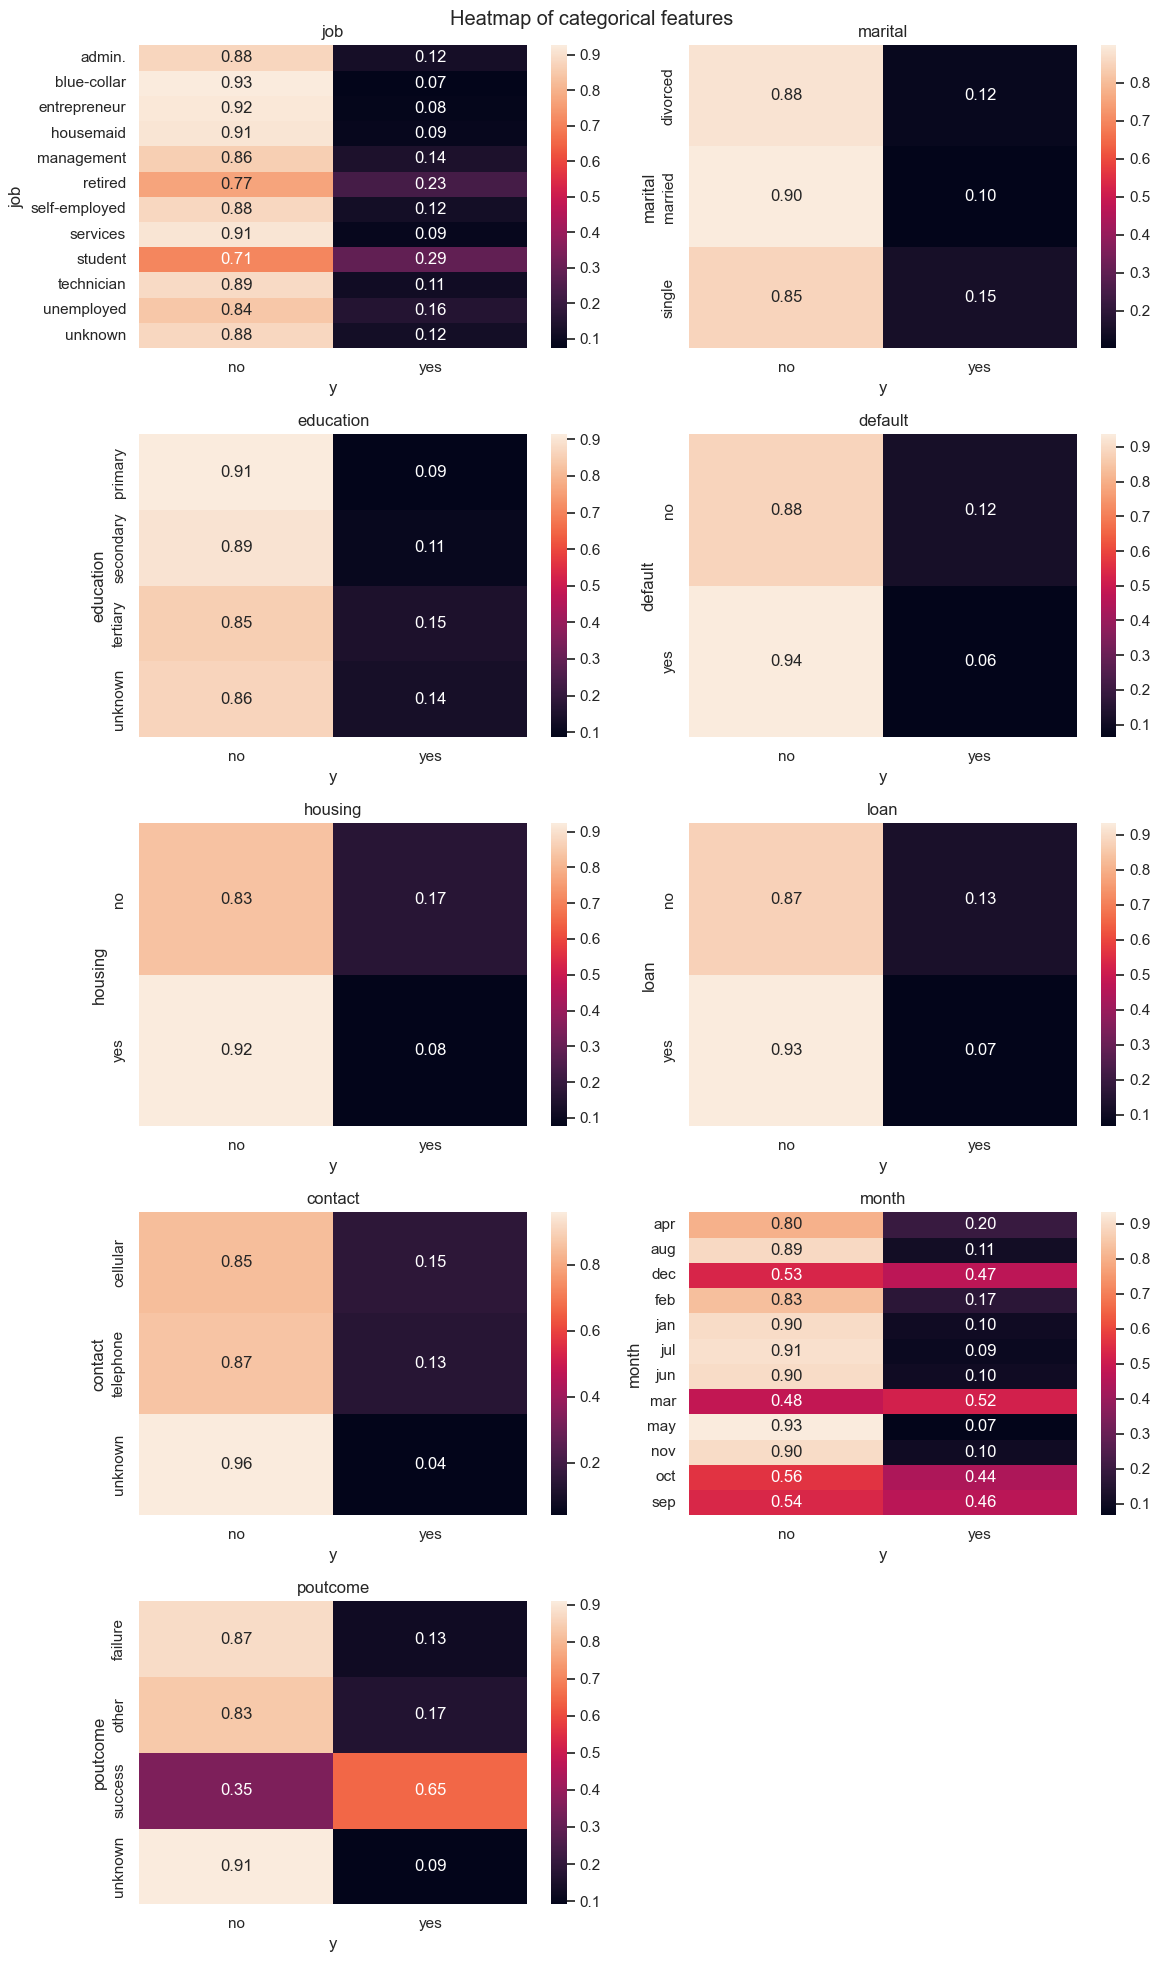

In [20]:
plotting.plotting_heatmap_cat_features(data, target, cat_features_origin)

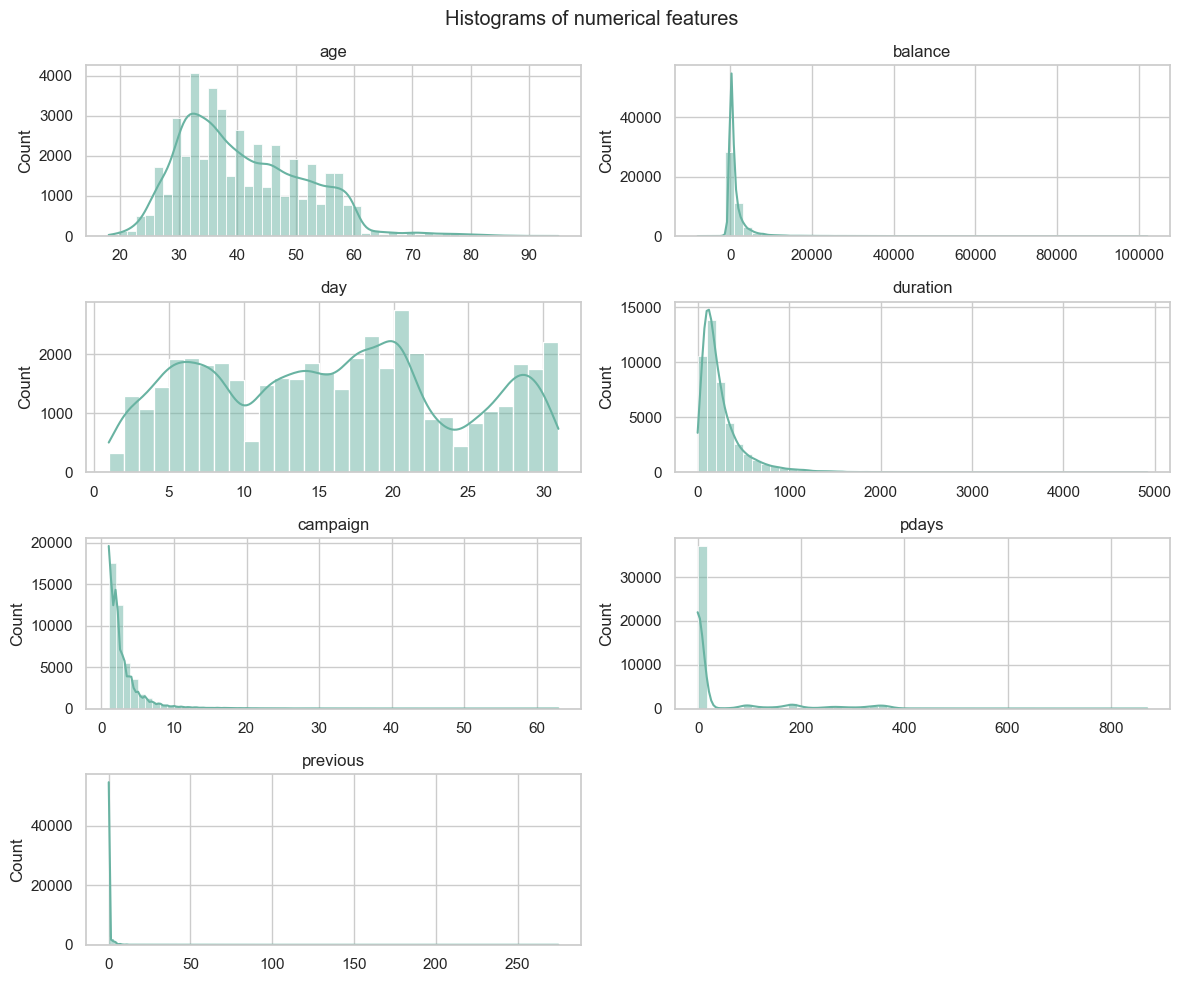

In [21]:
plotting.plotting_histogram_numerical_features(data, num_features_origin)

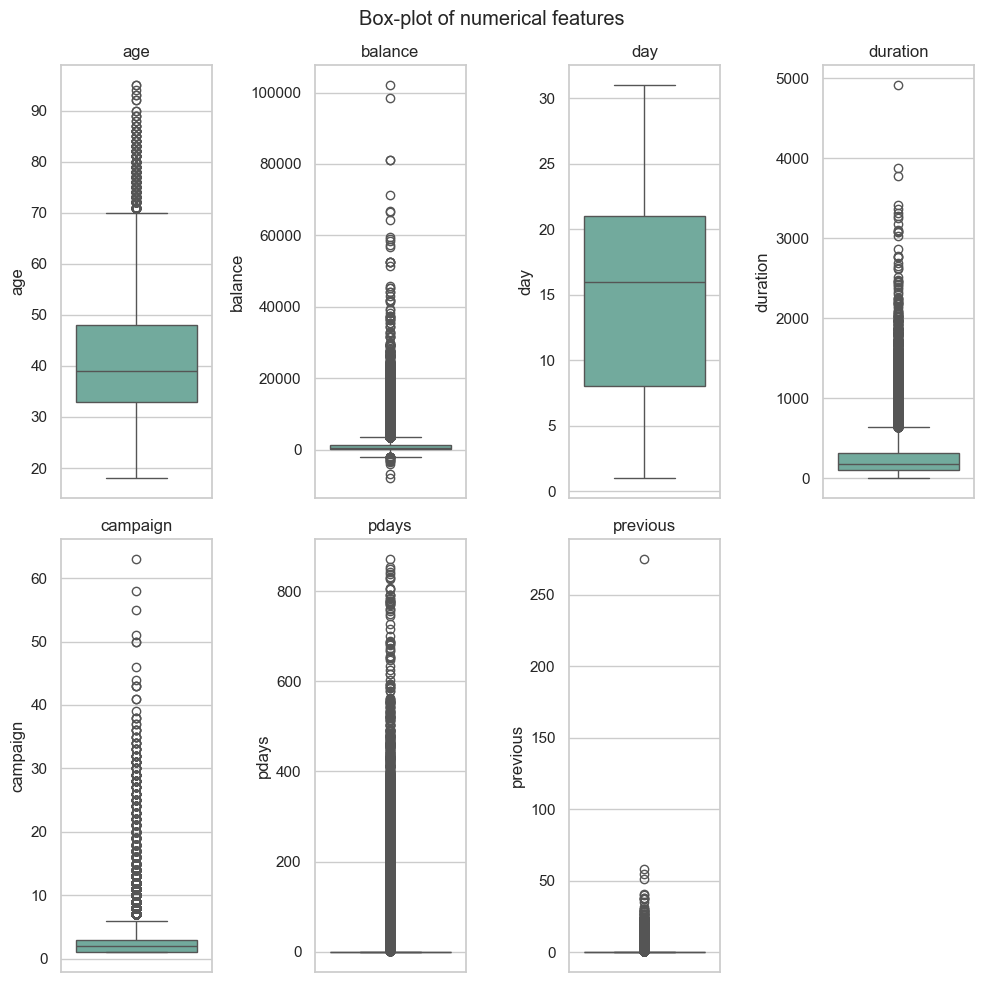

In [26]:
plotting.plotting_boxplot_numerical_features(data, num_features_origin)

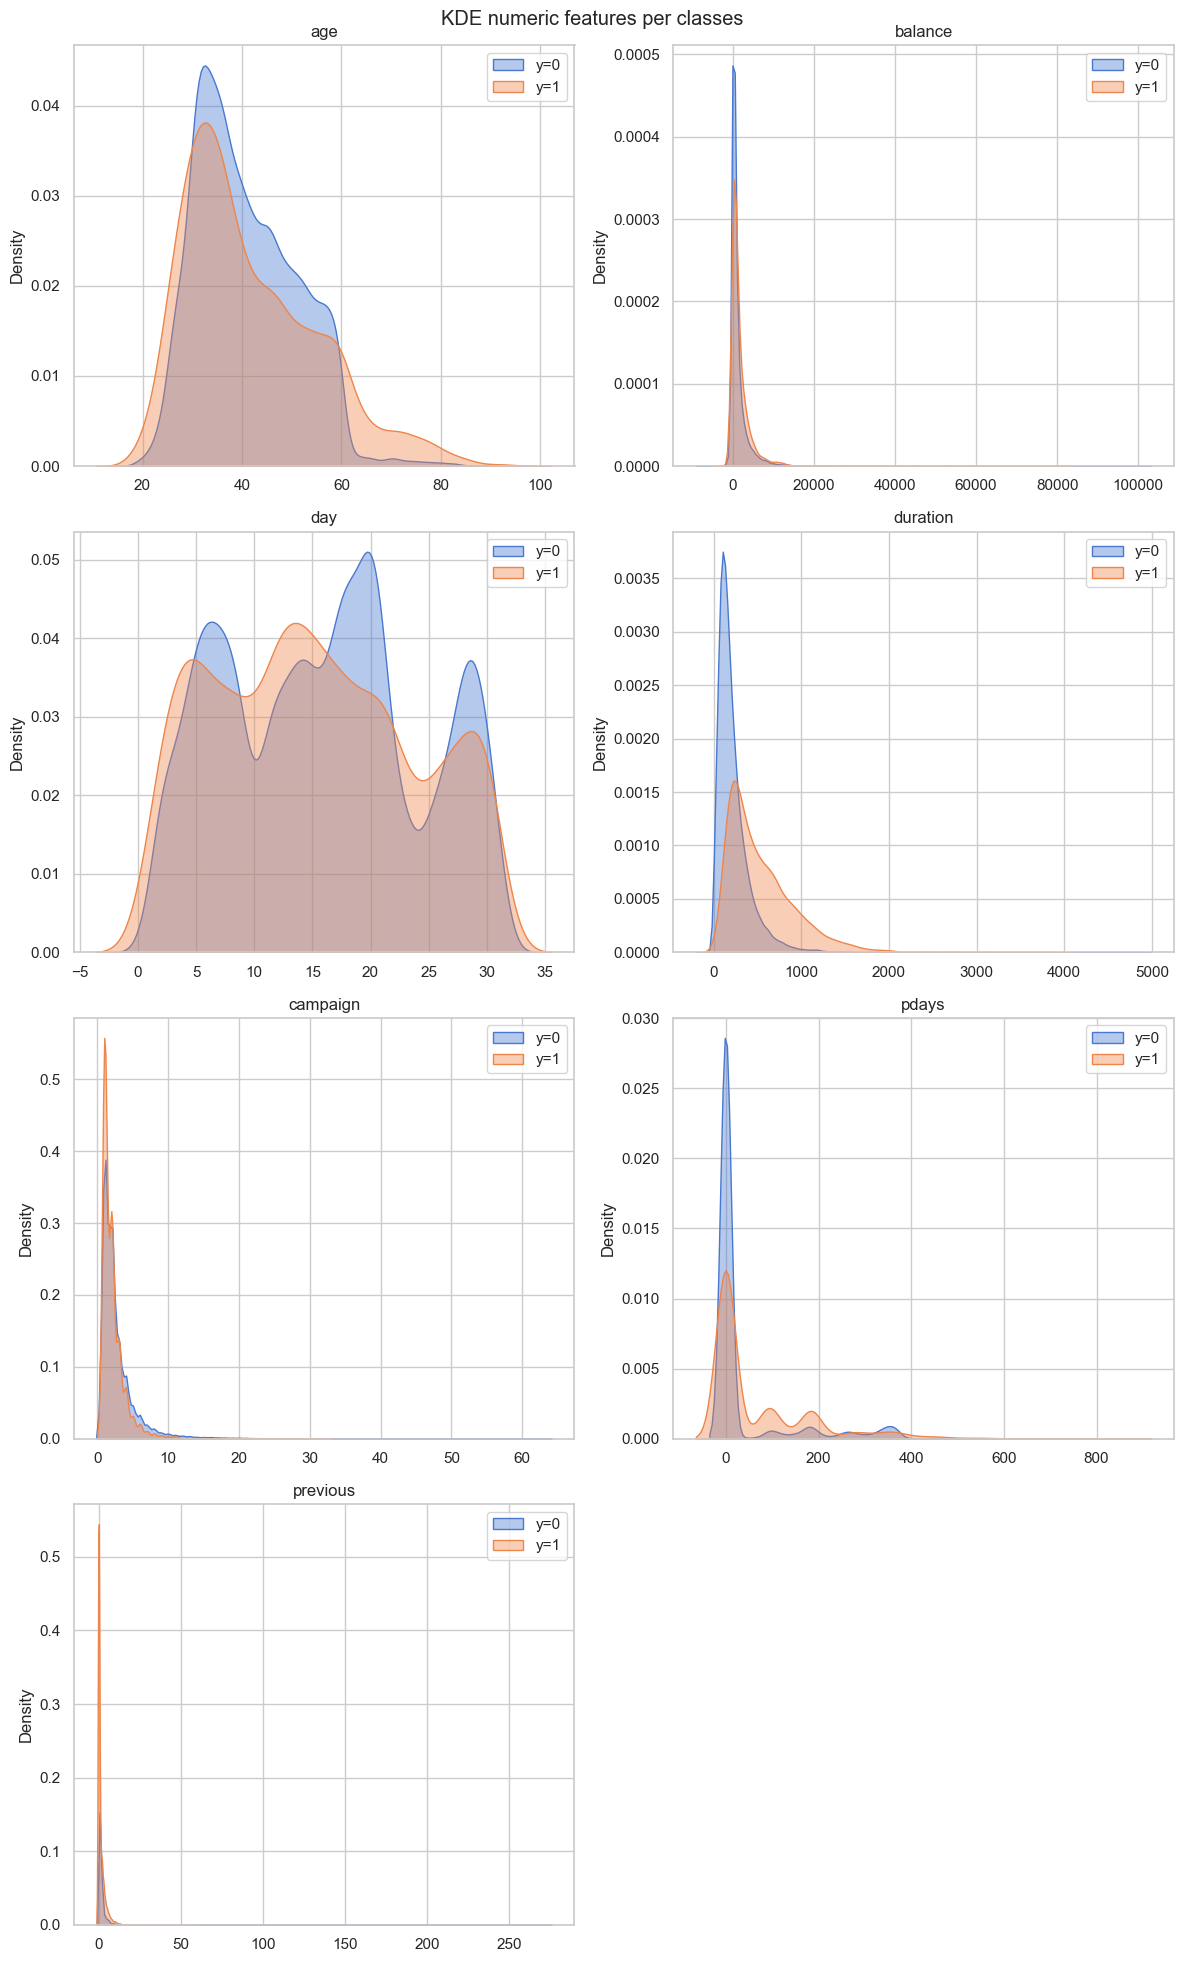

In [31]:
plotting.plotting_kde_per_target(data, target, num_features_origin)

In [32]:
drop_idx = data[data.previous == max(data.previous)].index
data = data.drop(drop_idx)
target = target.drop(drop_idx)
data_full = data_full.drop(drop_idx)
data_ids = pd.DataFrame(data_ids).drop(drop_idx)

data.shape[0], target.size

(45210, 45210)

In [35]:
drop_idx = data[data.duration == max(data.duration)].index
data = data.drop(drop_idx)
target = target.drop(drop_idx)
data_full = data_full.drop(drop_idx)
data_ids = pd.DataFrame(data_ids).drop(drop_idx)

data.shape[0], target.size

(45209, 45209)

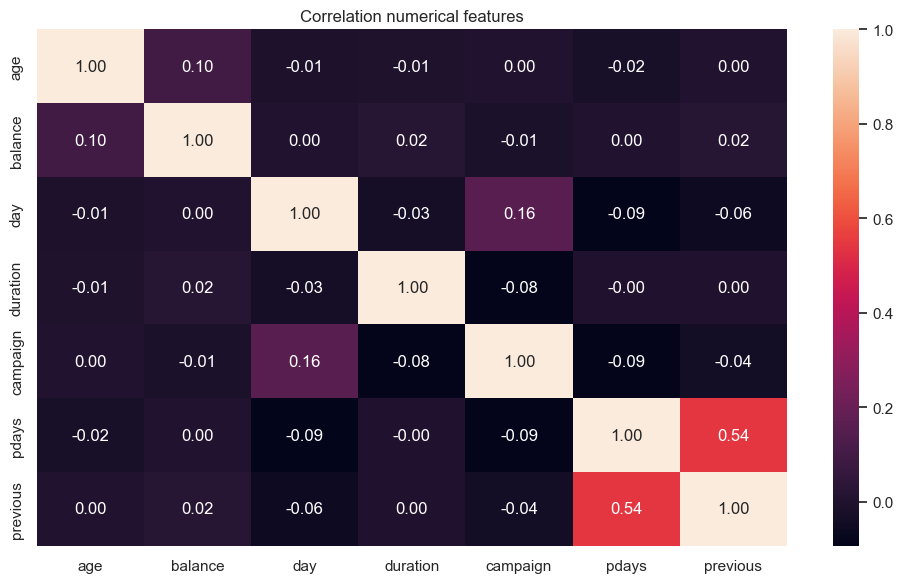

In [36]:
corr = data[num_features_origin].corr()

plt.figure()
sns.heatmap(data=corr, annot=True, fmt=".2f")
plt.title("Correlation numerical features")
plt.tight_layout()
plt.show()

In [37]:
data_full.groupby(by="y")["previous"].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39920.0,0.495291,1.790438,0.0,0.0,0.0,0.0,51.0
yes,5289.0,1.170354,2.553272,0.0,0.0,0.0,1.0,58.0


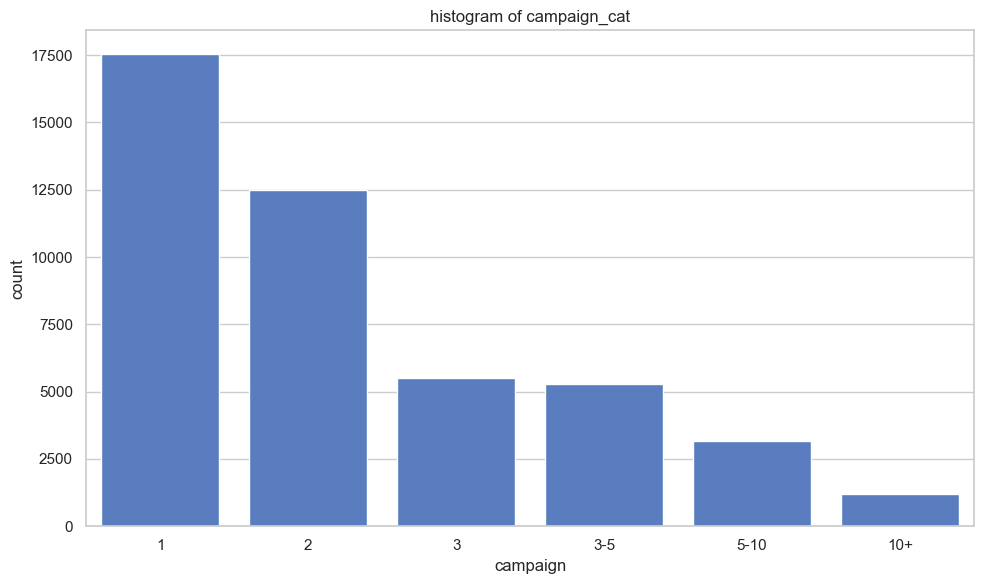

In [38]:
campaign_cat = transforms.campaign_categorical(data)

plt.figure()
sns.countplot(x=campaign_cat)
plt.title("histogram of campaign_cat")
plt.tight_layout()
plt.show()

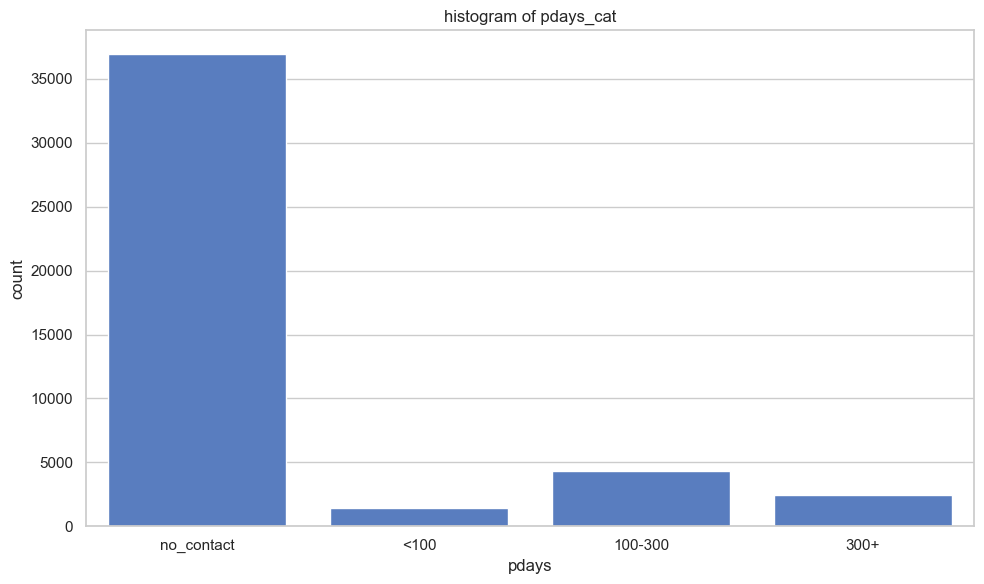

In [39]:
pdays_cat = transforms.pdays_categorical(data)

plt.figure()
sns.countplot(x=pdays_cat)
plt.title("histogram of pdays_cat")
plt.tight_layout()
plt.show()

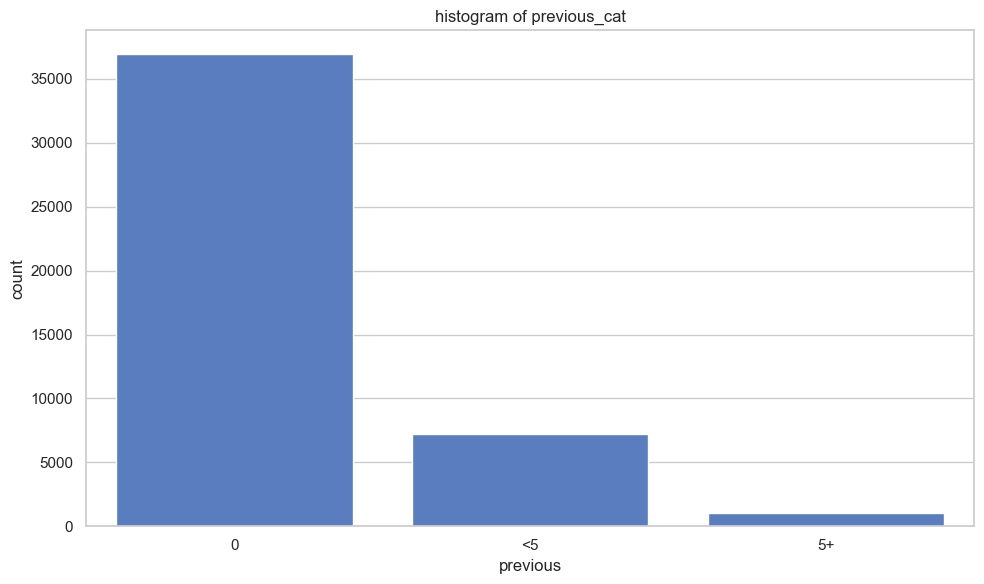

In [40]:
previous_cat = transforms.previous_categorical(data)

plt.figure()
sns.countplot(x=previous_cat)
plt.title("histogram of previous_cat")
plt.tight_layout()
plt.show()

In [41]:
data_ids

,0
0,0
1,1
2,2
3,3
4,4
...,...
45206,45206
45207,45207
45208,45208
45209,45209


In [42]:
path_data_save = ROOT / "data/processed/full_dataset"
io_utils.save_df_parquet(data, path_data_save / "clean_data_features.parquet")
io_utils.save_df_parquet(target, path_data_save / "clean_target.parquet")
io_utils.save_df_parquet(data_ids, path_data_save / "clean_data_ids.parquet")

In [43]:
was_contact = (data.pdays != -1).astype(int)

crosstab = pd.crosstab(was_contact, target, normalize="index")
crosstab

y,0,1
pdays,,
0,0.908424,0.091576
1,0.769259,0.230741
